In [11]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [12]:
img_width, img_height = 150, 150

train_data_dir = 'Downloads/ml/flow/test'
validation_data_dir = 'Downloads/ml/flow/train'

In [13]:
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 696 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [14]:

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/home/kamlesh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kamlesh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/home/kamlesh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
nb_epoch = 10
nb_train_samples = 2048
nb_validation_samples = 832

In [17]:

model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

/home/kamlesh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/home/kamlesh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=128, epochs=10, validation_steps=832)`
  import sys


Epoch 1/10
128/128 [==============================] - 365s 3s/step - loss: 0.9134 - acc: 0.5391 - val_loss: 0.8883 - val_acc: 0.5214
Epoch 2/10
128/128 [==============================] - 350s 3s/step - loss: 0.6281 - acc: 0.6597 - val_loss: 0.5909 - val_acc: 0.6876
Epoch 3/10
128/128 [==============================] - 345s 3s/step - loss: 0.5002 - acc: 0.7617 - val_loss: 0.6727 - val_acc: 0.6792
Epoch 4/10
128/128 [==============================] - 343s 3s/step - loss: 0.3832 - acc: 0.8271 - val_loss: 0.8410 - val_acc: 0.6571
Epoch 5/10
128/128 [==============================] - 344s 3s/step - loss: 0.2869 - acc: 0.8843 - val_loss: 0.8357 - val_acc: 0.6742
Epoch 6/10
128/128 [==============================] - 344s 3s/step - loss: 0.1901 - acc: 0.9253 - val_loss: 0.9504 - val_acc: 0.6941
Epoch 7/10
128/128 [==============================] - 499s 4s/step - loss: 0.1267 - acc: 0.9556 - val_loss: 1.2848 - val_acc: 0.6758
Epoch 8/10
128/128 [==============================] - 408s 3s/step - 

[[0.]]
It's a Cat


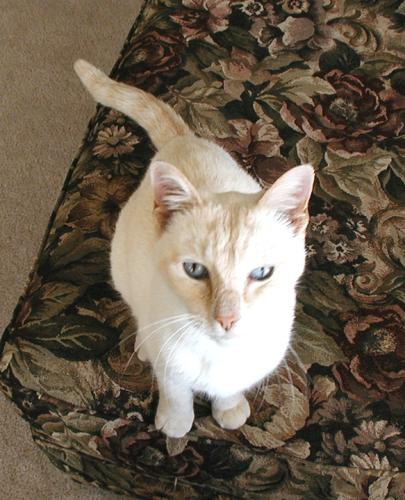

In [26]:
from keras.preprocessing import image

import numpy as np

img_path = '1.jpg'

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
print preds
if preds==1:
    print("It's a Dog")
else: 
    print("It's a Cat")

    
from IPython.display import Image
Image("1.jpg")